In [1]:
import torch
from torch import nn

In [2]:
import matplotlib.pyplot as plt 


In [3]:
from sklearn.datasets import make_circles


In [4]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = "cpu"
print(f"Using device = {device}")

Using device = cpu


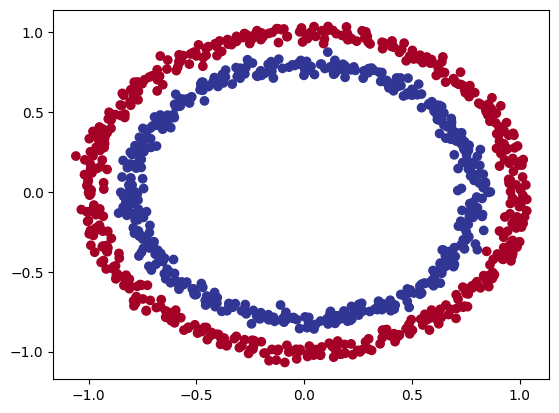

In [5]:
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
from sklearn.model_selection import train_test_split
print("Before ",type(X), type(y))
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print("After ",type(X), type(y))

Before  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
After  <class 'torch.Tensor'> <class 'torch.Tensor'>


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

(torch.Size([200, 2]), torch.Size([200]))

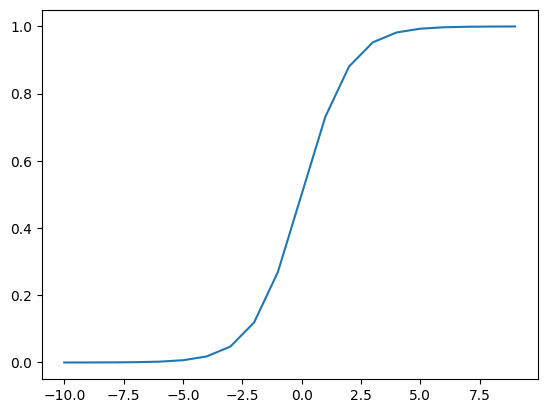

In [8]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = range(-10,10)
y = [sigmoid(val) for val in x]
plt.plot(x, y);

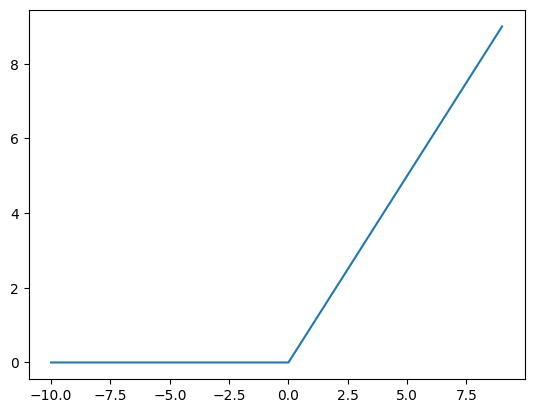

In [9]:
import numpy as np
def RELU(x):
    if(x<=0):
        return 0
    else:
        return x

x = range(-10,10)
y = [RELU(val) for val in x]
plt.plot(x, y);

In [10]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [11]:
model_0 = CircleModel()
model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')

In [12]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.6186,  0.5979],
                      [-0.3432, -0.2683],
                      [ 0.6637,  0.6187],
                      [-0.6693,  0.4605],
                      [ 0.2871,  0.2597],
                      [ 0.3016, -0.2105],
                      [-0.5776,  0.6027],
                      [ 0.1606,  0.1166],
                      [ 0.2710,  0.6892],
                      [ 0.0476, -0.3629]])),
             ('layer_1.bias',
              tensor([ 0.2123, -0.2801, -0.3232, -0.6291, -0.2173,  0.4631, -0.5426, -0.4869,
                      -0.5135,  0.5082])),
             ('layer_2.weight',
              tensor([[-0.2116,  0.0327, -0.0925,  0.1239,  0.0037,  0.1406, -0.0506, -0.1047,
                       -0.2119,  0.2988],
                      [ 0.0435,  0.1505, -0.0911, -0.1025,  0.0528, -0.2256,  0.0150, -0.1258,
                       -0.0459,  0.2475],
                      [-0.1838,  0.3000,  0.0347,  0.2719,  0.2433, -0.0

In [13]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(), lr=0.05 
)

In [14]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc 

In [15]:
epochs = 3000
torch.manual_seed(42)
trainLossList = []
testLossList = []
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass 
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # 2. Compute training loss
    loss = loss_fn(y_logits, y_train)

    # 3. Zero grad the optimizer
    optimizer.zero_grad()

    # 4. Loss backward -> backpropagate
    loss.backward()

    #5. Step the optimizer
    optimizer.step()

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch}| Train Loss: {loss:.4f}| Train Acc: {acc}| Test Loss: {test_loss:.4f}| Test Acc: {test_acc}")

    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())

Epoch: 0| Train Loss: 0.7098| Train Acc: 50.0| Test Loss: 0.7088| Test Acc: 50.0
Epoch: 10| Train Loss: 0.7051| Train Acc: 50.0| Test Loss: 0.7042| Test Acc: 50.0
Epoch: 20| Train Loss: 0.7015| Train Acc: 50.0| Test Loss: 0.7007| Test Acc: 50.0
Epoch: 30| Train Loss: 0.6991| Train Acc: 50.0| Test Loss: 0.6984| Test Acc: 50.0
Epoch: 40| Train Loss: 0.6975| Train Acc: 50.0| Test Loss: 0.6968| Test Acc: 50.0
Epoch: 50| Train Loss: 0.6963| Train Acc: 50.0| Test Loss: 0.6956| Test Acc: 50.0
Epoch: 60| Train Loss: 0.6954| Train Acc: 50.0| Test Loss: 0.6948| Test Acc: 50.0
Epoch: 70| Train Loss: 0.6948| Train Acc: 50.0| Test Loss: 0.6941| Test Acc: 50.0
Epoch: 80| Train Loss: 0.6943| Train Acc: 50.0| Test Loss: 0.6936| Test Acc: 50.0
Epoch: 90| Train Loss: 0.6939| Train Acc: 50.0| Test Loss: 0.6932| Test Acc: 50.0
Epoch: 100| Train Loss: 0.6936| Train Acc: 50.0| Test Loss: 0.6929| Test Acc: 50.0
Epoch: 110| Train Loss: 0.6934| Train Acc: 50.0| Test Loss: 0.6927| Test Acc: 50.0
Epoch: 120| Tra

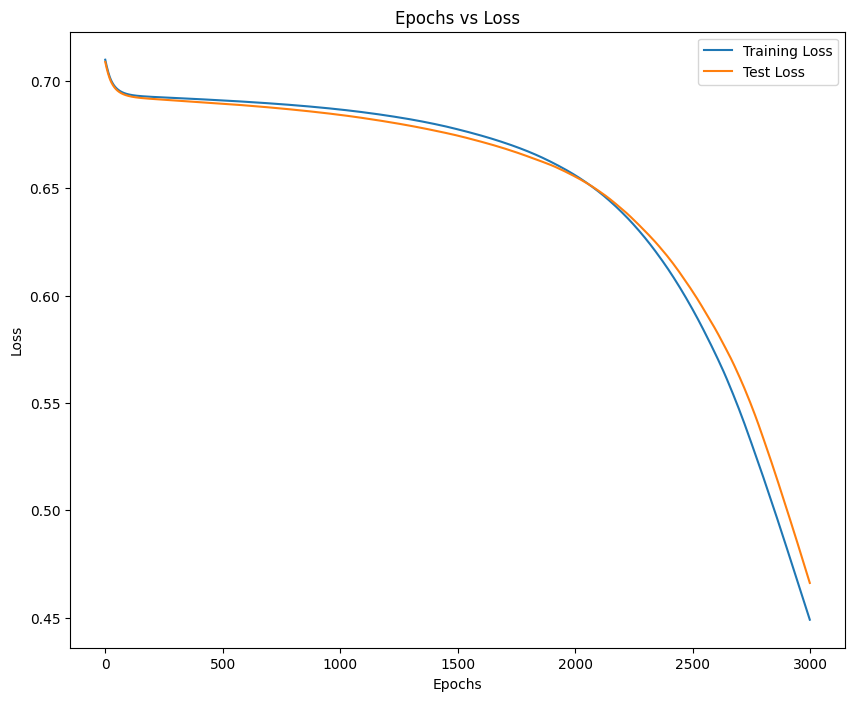

In [16]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend();

In [17]:
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()
print(y_preds)

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])


In [19]:


def plot_decision_boundary(model, X, y):
    """Plots decision boundary of a PyTorch model"""
    X = X.numpy()
    y = y.numpy()

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    X_grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    
    model.eval()
    with torch.no_grad():
        y_pred = model(X_grid)
        y_pred = torch.round(torch.sigmoid(y_pred))
    
    y_pred = y_pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.show()


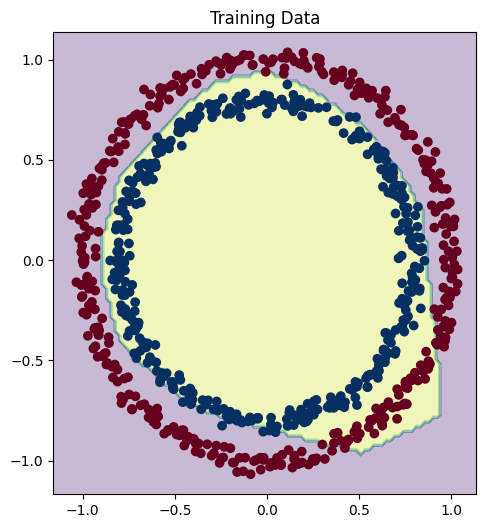

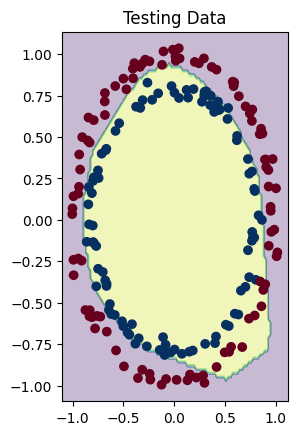

In [20]:
# from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Training Data")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Data")
plot_decision_boundary(model_0, X_test, y_test)